In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_insurance = pd.read_csv('insurance.csv')

# 목차
1. 분석 방향
2. 데이터 Overview
3. 데이터 전처리
    1. 중복 제거
    2. 결측치 처리
    3. 이상치 처리
# 분석 방향
1. 배경
 본 데이터는 미국 거주민에 대한 의료 비용 데이터이다.


# 데이터 Overview

In [4]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 스키마 분석
----------------------
|변수|정의|설명|변수|타입|
|-----|---|---|---|---|
|age|나이||continuous|int|
|sex|성별||binary|object|
|bmi|BMI|이상적인 범위 18.5~24.9|continuous|float|
|children|자녀 수|부양가족을 의미|discrete|int|
|smorker|흡연 여부||binary|object|
|region|지역||nominal categorical|object|
|charges|청구액||continuous|float|
## 데이터 크기
`1338` rows * `7` columns

# 데이터 전처리

## 중복 제거

In [7]:
df_insurance[df_insurance.duplicated(keep=False)]
# 나머지 값이 같으면 charges 역시 같아야 하는 게 맞지만, 확률적으로 모든 조건이 같을 고객이 있기는 힘들다.
# 중복 제거

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df_insurance.drop_duplicates(inplace=True)

## 결측치 처리

In [9]:
df_insurance.isna().sum()
# 결측치 없음을 확인

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 이상치 처리

### bmi

In [10]:
df_insurance['bmi'].sort_values().tail(10)

438     46.75
543     47.41
401     47.52
860     47.60
1088    47.74
286     48.07
116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64

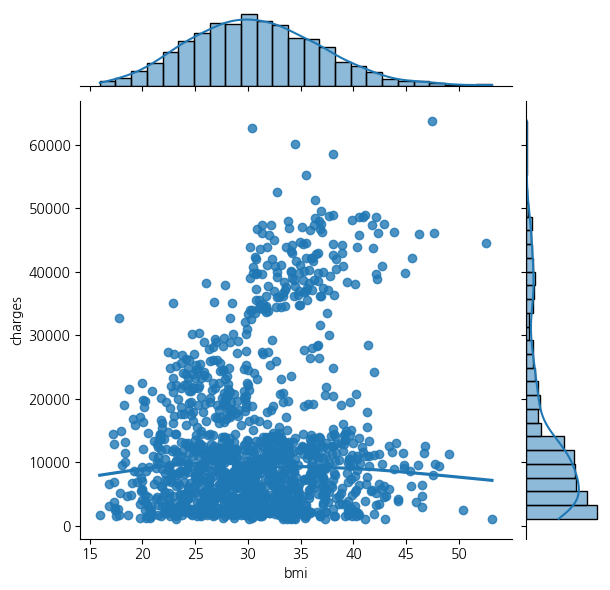

In [11]:
sns.jointplot(df_insurance,x='bmi',y='charges',kind='reg',lowess=True)
# charges의 대부분이 저금액에 몰려있어서 reg가 의미가 불분명함
# 회귀선이 중간 완만하게 볼록한 구간의 해석 : BMI가 일정구간 들어오면 비용을 올린다 or BMI 중간에 걸친 사람들이 다른 비용 조건들을 만족하는 상황일 수 있다.
# bmi가 정상 범위에서 상당히 먼 데이터가 있지만 불가능한 데이터가 아님을 확인

## 그래프 및 상관관계 분석

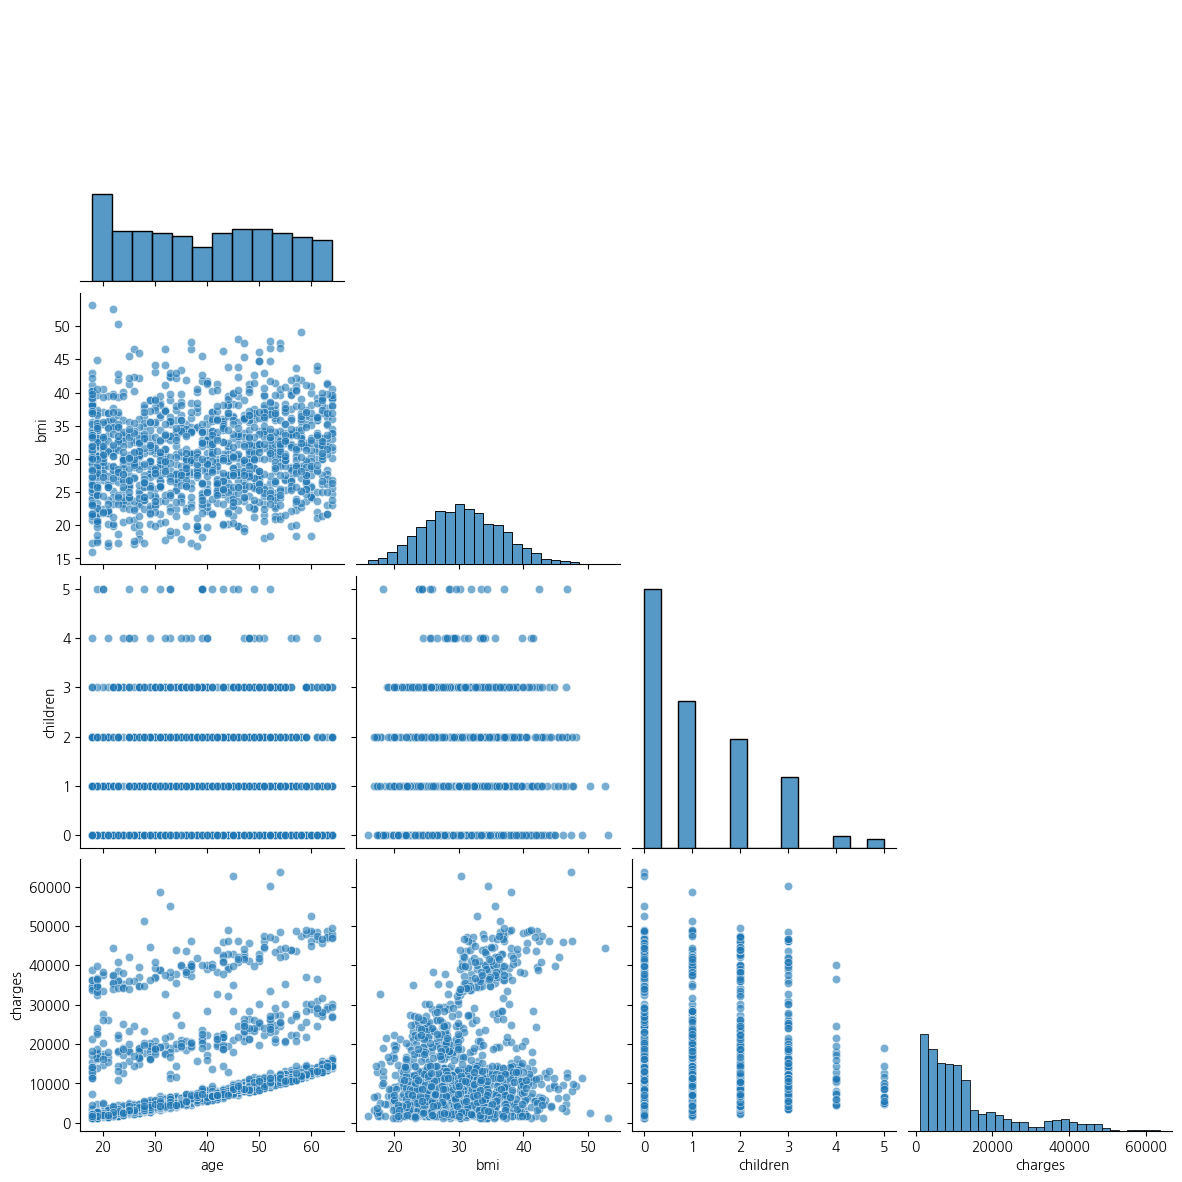

In [ ]:
sns.pairplot(df_insurance,plot_kws={'alpha':0.6},corner=True,height=3)
plt.show()
# age에서 층별로 나뉘는 것을 발견, 어떠한 분류 작업이 있는듯
# bmi에 따른 charges도 대부분 낮지만 bmi 30 부분부터 층이 나뉘기 시작

<Axes: >

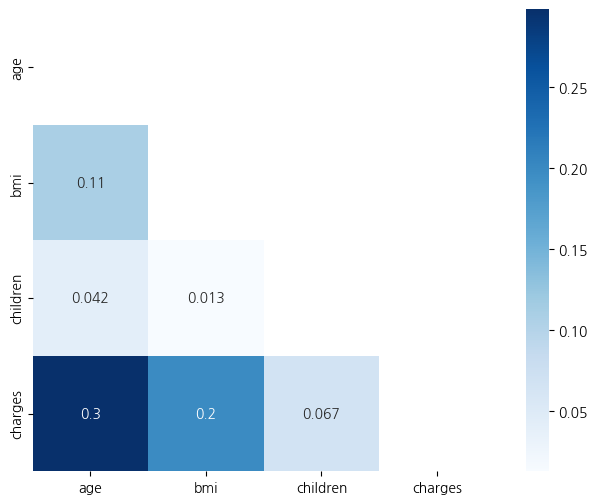

In [14]:
corr=df_insurance.corr(numeric_only=True)
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr,mask=mask,annot=True,cmap='Blues',square=True)

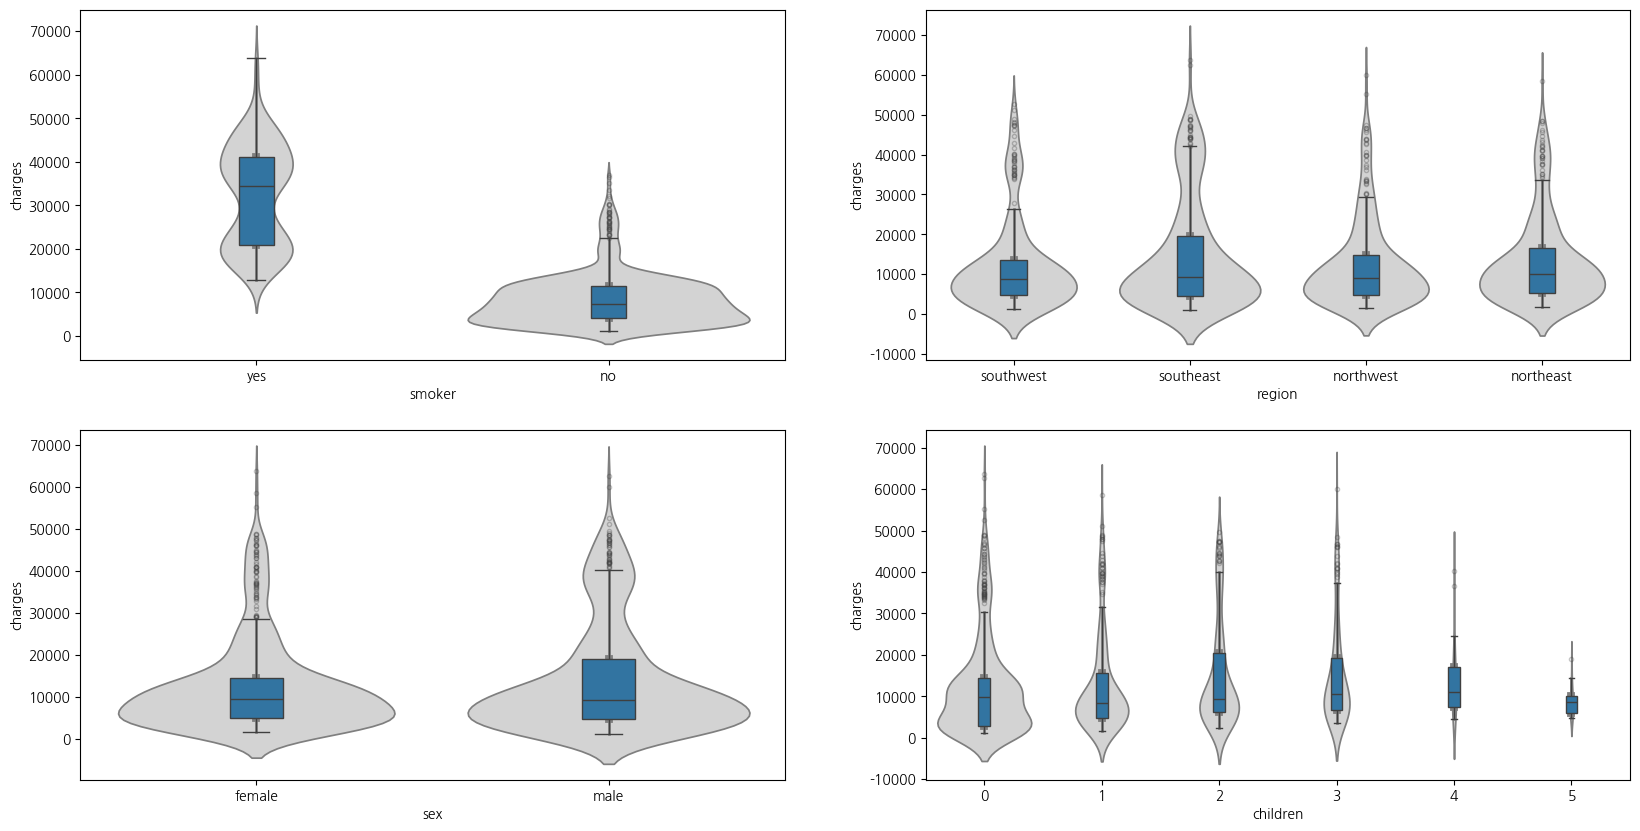

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.violinplot(df_insurance,x='smoker', y='charges',color='lightgray',density_norm='count')
sns.boxplot(df_insurance, x='smoker', y='charges', width=0.1,flierprops={'markersize': 3,'alpha': 0.3})
plt.subplot(222)
sns.violinplot(df_insurance,x='region', y='charges',color='lightgray',density_norm='count')
sns.boxplot(df_insurance, x='region', y='charges', width=0.15,flierprops={'markersize': 3,'alpha': 0.3})
plt.subplot(223)
sns.violinplot(df_insurance,x='sex', y='charges',color='lightgray',density_norm='count')
sns.boxplot(df_insurance, x='sex', y='charges', width=0.15,flierprops={'markersize': 3,'alpha': 0.3})
plt.subplot(224)
sns.violinplot(df_insurance,x='children', y='charges',color='lightgray',density_norm='count')
sns.boxplot(df_insurance, x='children', y='charges', width=0.1,flierprops={'markersize': 3,'alpha': 0.3})
plt.show()
# smoker yes에서 층이 두 개로 나뉜다. 그 이유는? 어떠한 기준에 따라 비용이 확 증가하는 구간이 있을 것.
# no라고 대답한 사람 중에서도 극단적으로 높은 비용이 발생하는 사람들은 어떤 특징이 있을까?
# 지역으로 나눴을 때도, 크진 않더라도 위에서 볼록해지는 경향이 보인다. 지역별인 차이는 별로 없는 듯
# 자녀 수 4, 5는 너무 적어서 유의미한 관계를 파악하기 어려움.

# 발견
- age에서 층별로 나뉘는 것을 발견, 어떠한 분류 작업이 있는듯
- bmi에 따른 charges도 대부분 낮지만 bmi 30 부분부터 층이 나뉘기 시작
- smoker yes에서 층이 두 개로 나뉜다. 그 이유는? 어떠한 기준에 따라 비용이 확 증가하는 구간이 있을 것.
- no라고 대답한 사람 중에서도 극단적으로 높은 비용이 발생하는 사람들은 어떤 특징이 있을까?
- 지역으로 나눴을 때도, 크진 않더라도 위에서 볼록해지는 경향이 보인다. 지역별인 차이는 별로 없는 듯
- male에 기본적으로 높은 금액대가 형성되어있는 것을 확인, 아마 남성이 담배를 더 많이 핀다거나, 남성이 평균 수명이 적으니까 더 금액을 높게 부과하는 게 아닐까?
- 자녀 수 4, 5는 너무 적어서 유의미한 관계를 파악하기 어려움.
- age가 커질수록 사~~알짞 증가하는 bmi



<Axes: xlabel='sex', ylabel='charges'>

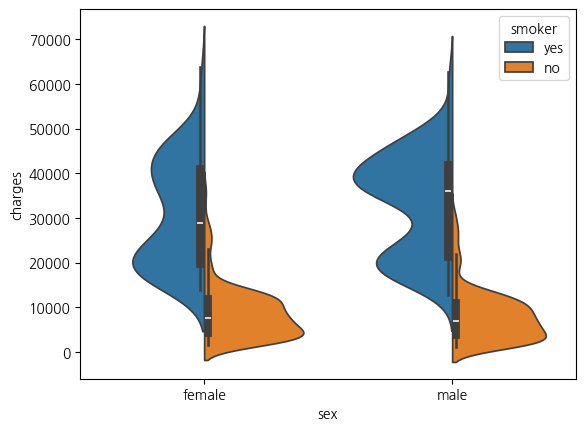

In [ ]:
sns.violinplot(df_insurance, x='sex', y='charges', density_norm='count',hue='smoker',split=True)
# 담배 안 피우는 남,녀는 상당히 비슷한 추세
# 그러나 역시 흡연자 층에서 두 그룹으로 나뉘며, 특히 남성쪽에서 층화가 뚜렷함.

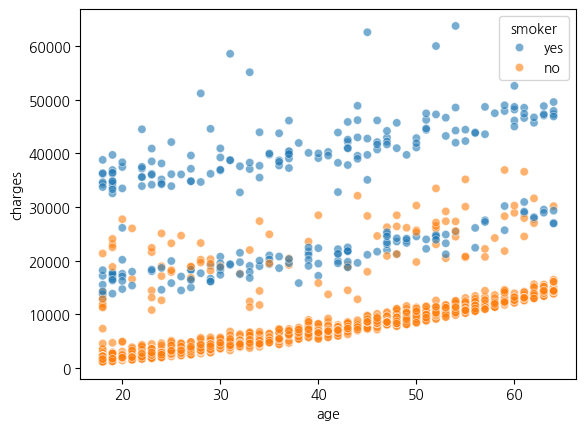

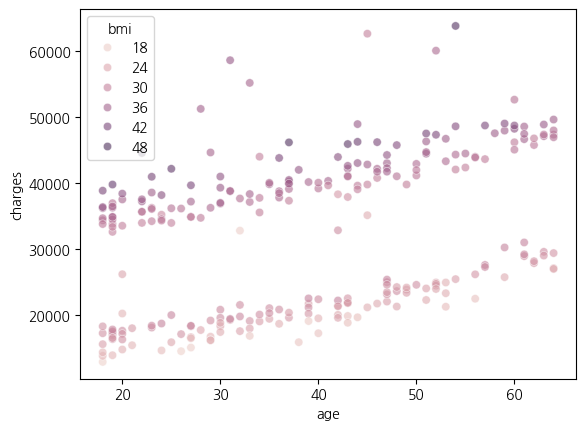

In [ ]:
sns.scatterplot(df_insurance, x='age', y='charges', hue='smoker', alpha=0.6)
plt.show()
df_smoker=df_insurance[df_insurance['smoker'] =='yes']
sns.scatterplot(df_smoker, x='age', y='charges', hue='bmi', alpha=0.6)
plt.show()
# age - charges 그래프에서 층화의 첫 번째 원인은 흡연 유무
# 두 번째 원인은 bmi로 보임. bmi가 높을수록 비용이 더 높아지는 경향이 뚜렷함

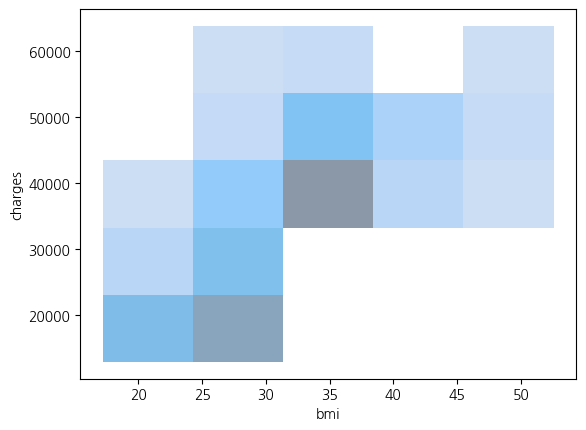

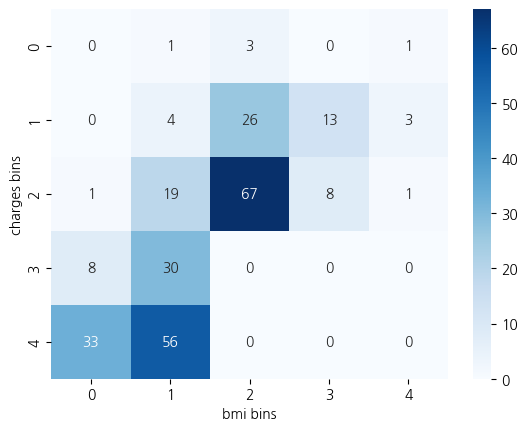

In [ ]:
sns.histplot(df_smoker, x='bmi', y='charges', alpha=0.6, bins=5)
plt.show()
# bin 개수
bins = 5

# 2D histogram 계산
counts, xedges, yedges = np.histogram2d(
    df_smoker['bmi'],
    df_smoker['charges'],
    bins=bins
)

# heatmap으로 시각화 + 숫자 표시
sns.heatmap(
    counts.T[::-1],
    annot=True,
    fmt='.0f',
    cmap='Blues'
)

plt.xlabel('bmi bins')
plt.ylabel('charges bins')
plt.show()

# bmi가 3번째 구간부터 3만 이상으로 훅 뛰는 것을 확인

<Axes: xlabel='bmi', ylabel='charges'>

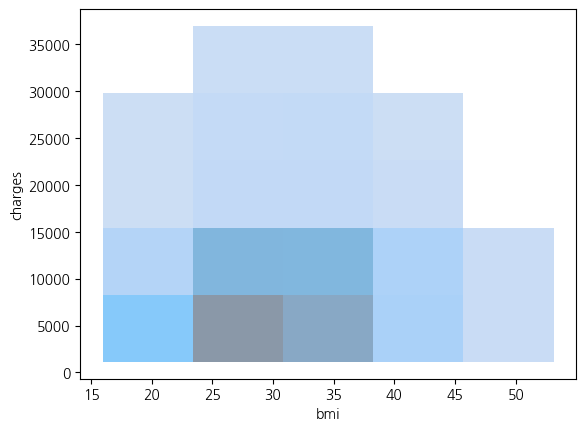

In [49]:
df_nonsmoker=df_insurance[df_insurance['smoker'] =='no']
sns.histplot(df_nonsmoker, x='bmi', y='charges', alpha=0.6, bins=5)

## 증명
- 담배 안 피우는 남,녀는 상당히 비슷한 추세
- 그러나 역시 흡연자 층에서 두 그룹으로 나뉘며, 특히 남성쪽에서 층화가 뚜렷함.
- age - charges 그래프에서 층화의 첫 번째 원인은 흡연 유무
- 두 번째 원인은 bmi로 보임. bmi가 높을수록 비용이 더 높아지는 경향이 뚜렷함
- bmi가 3번째 구간부터 3만 이상으로 훅 뛰는 것을 확인

# 가설
## 1번
bmi를 계층으로 금액 나뉜다.
## 2번
지역별로 금액의 차이는 없다.
## 3번
비흡연자 내에서는 age의 영향이 제일 크다.
## 4번
흡연자 내에서는 bmi 이외에는 영향이 미비하다.
## 5번
부양가족이 없을수록 담배를 더 많이 핀다. (부양가족이 없는 사람이 흡연자일 가능성이 높으므로 고액대가 더 많이 발생하는 것이다.)
## 6번
비용의 가장 큰 원인 흡연이다.